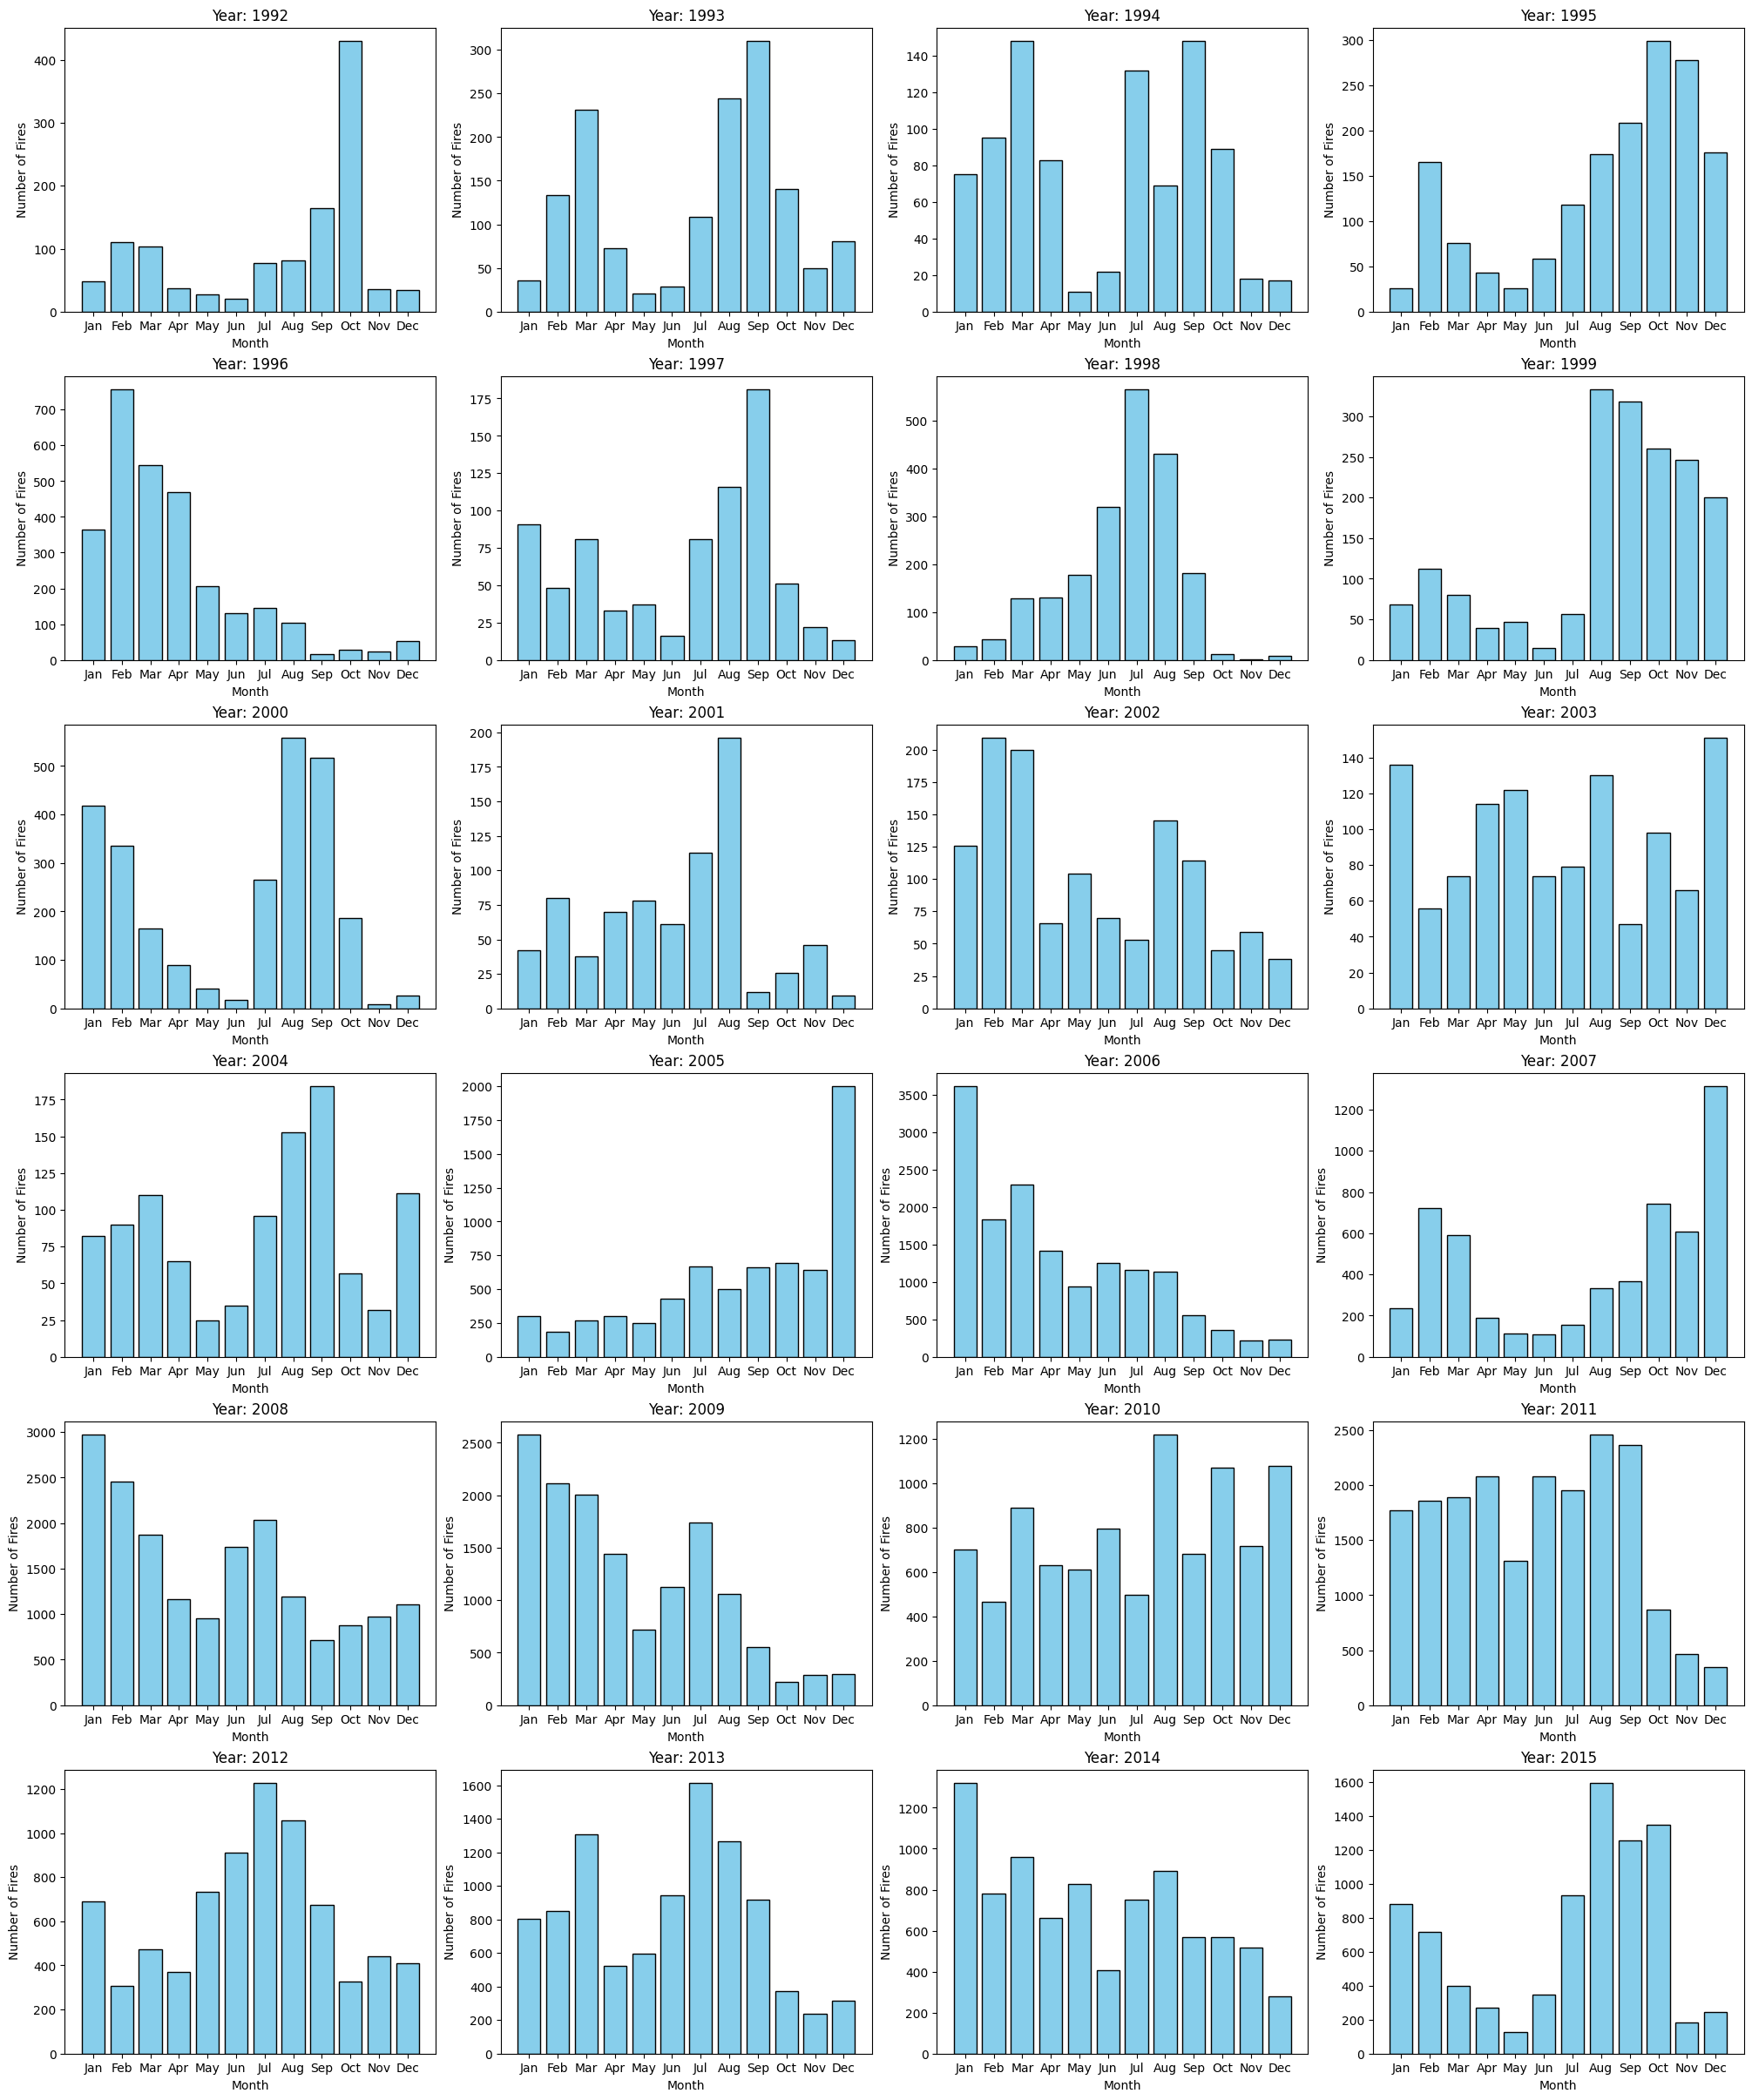

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('dataset/texas_fires.csv')

# Convert DISCOVERY_DATE_NEW to datetime format
df['DISCOVERY_DATE_NEW'] = pd.to_datetime(df['DISCOVERY_DATE_NEW'])

# Extract month and year
df['Month'] = df['DISCOVERY_DATE_NEW'].dt.month
df['Year'] = df['DISCOVERY_DATE_NEW'].dt.year

# Group by year and month, then count the number of fires
monthly_fires = df.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')

# Get unique years and set up subplots
unique_years = monthly_fires['Year'].unique()
num_years = len(unique_years)
cols = 4  # Number of columns in subplot grid
rows = (num_years // cols) + (num_years % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), constrained_layout=True)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each year's histogram
for i, year in enumerate(unique_years):
    data = monthly_fires[monthly_fires['Year'] == year]
    month_data = np.repeat(data['Month'], data['Fire_Count'])
    hist, bins = np.histogram(month_data, bins=np.arange(1, 14))
    
    axes[i].bar(bins[:-1], hist, width=0.8, align='center', color='skyblue', edgecolor='black')
    axes[i].set_title(f'Year: {year}')
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Fires')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


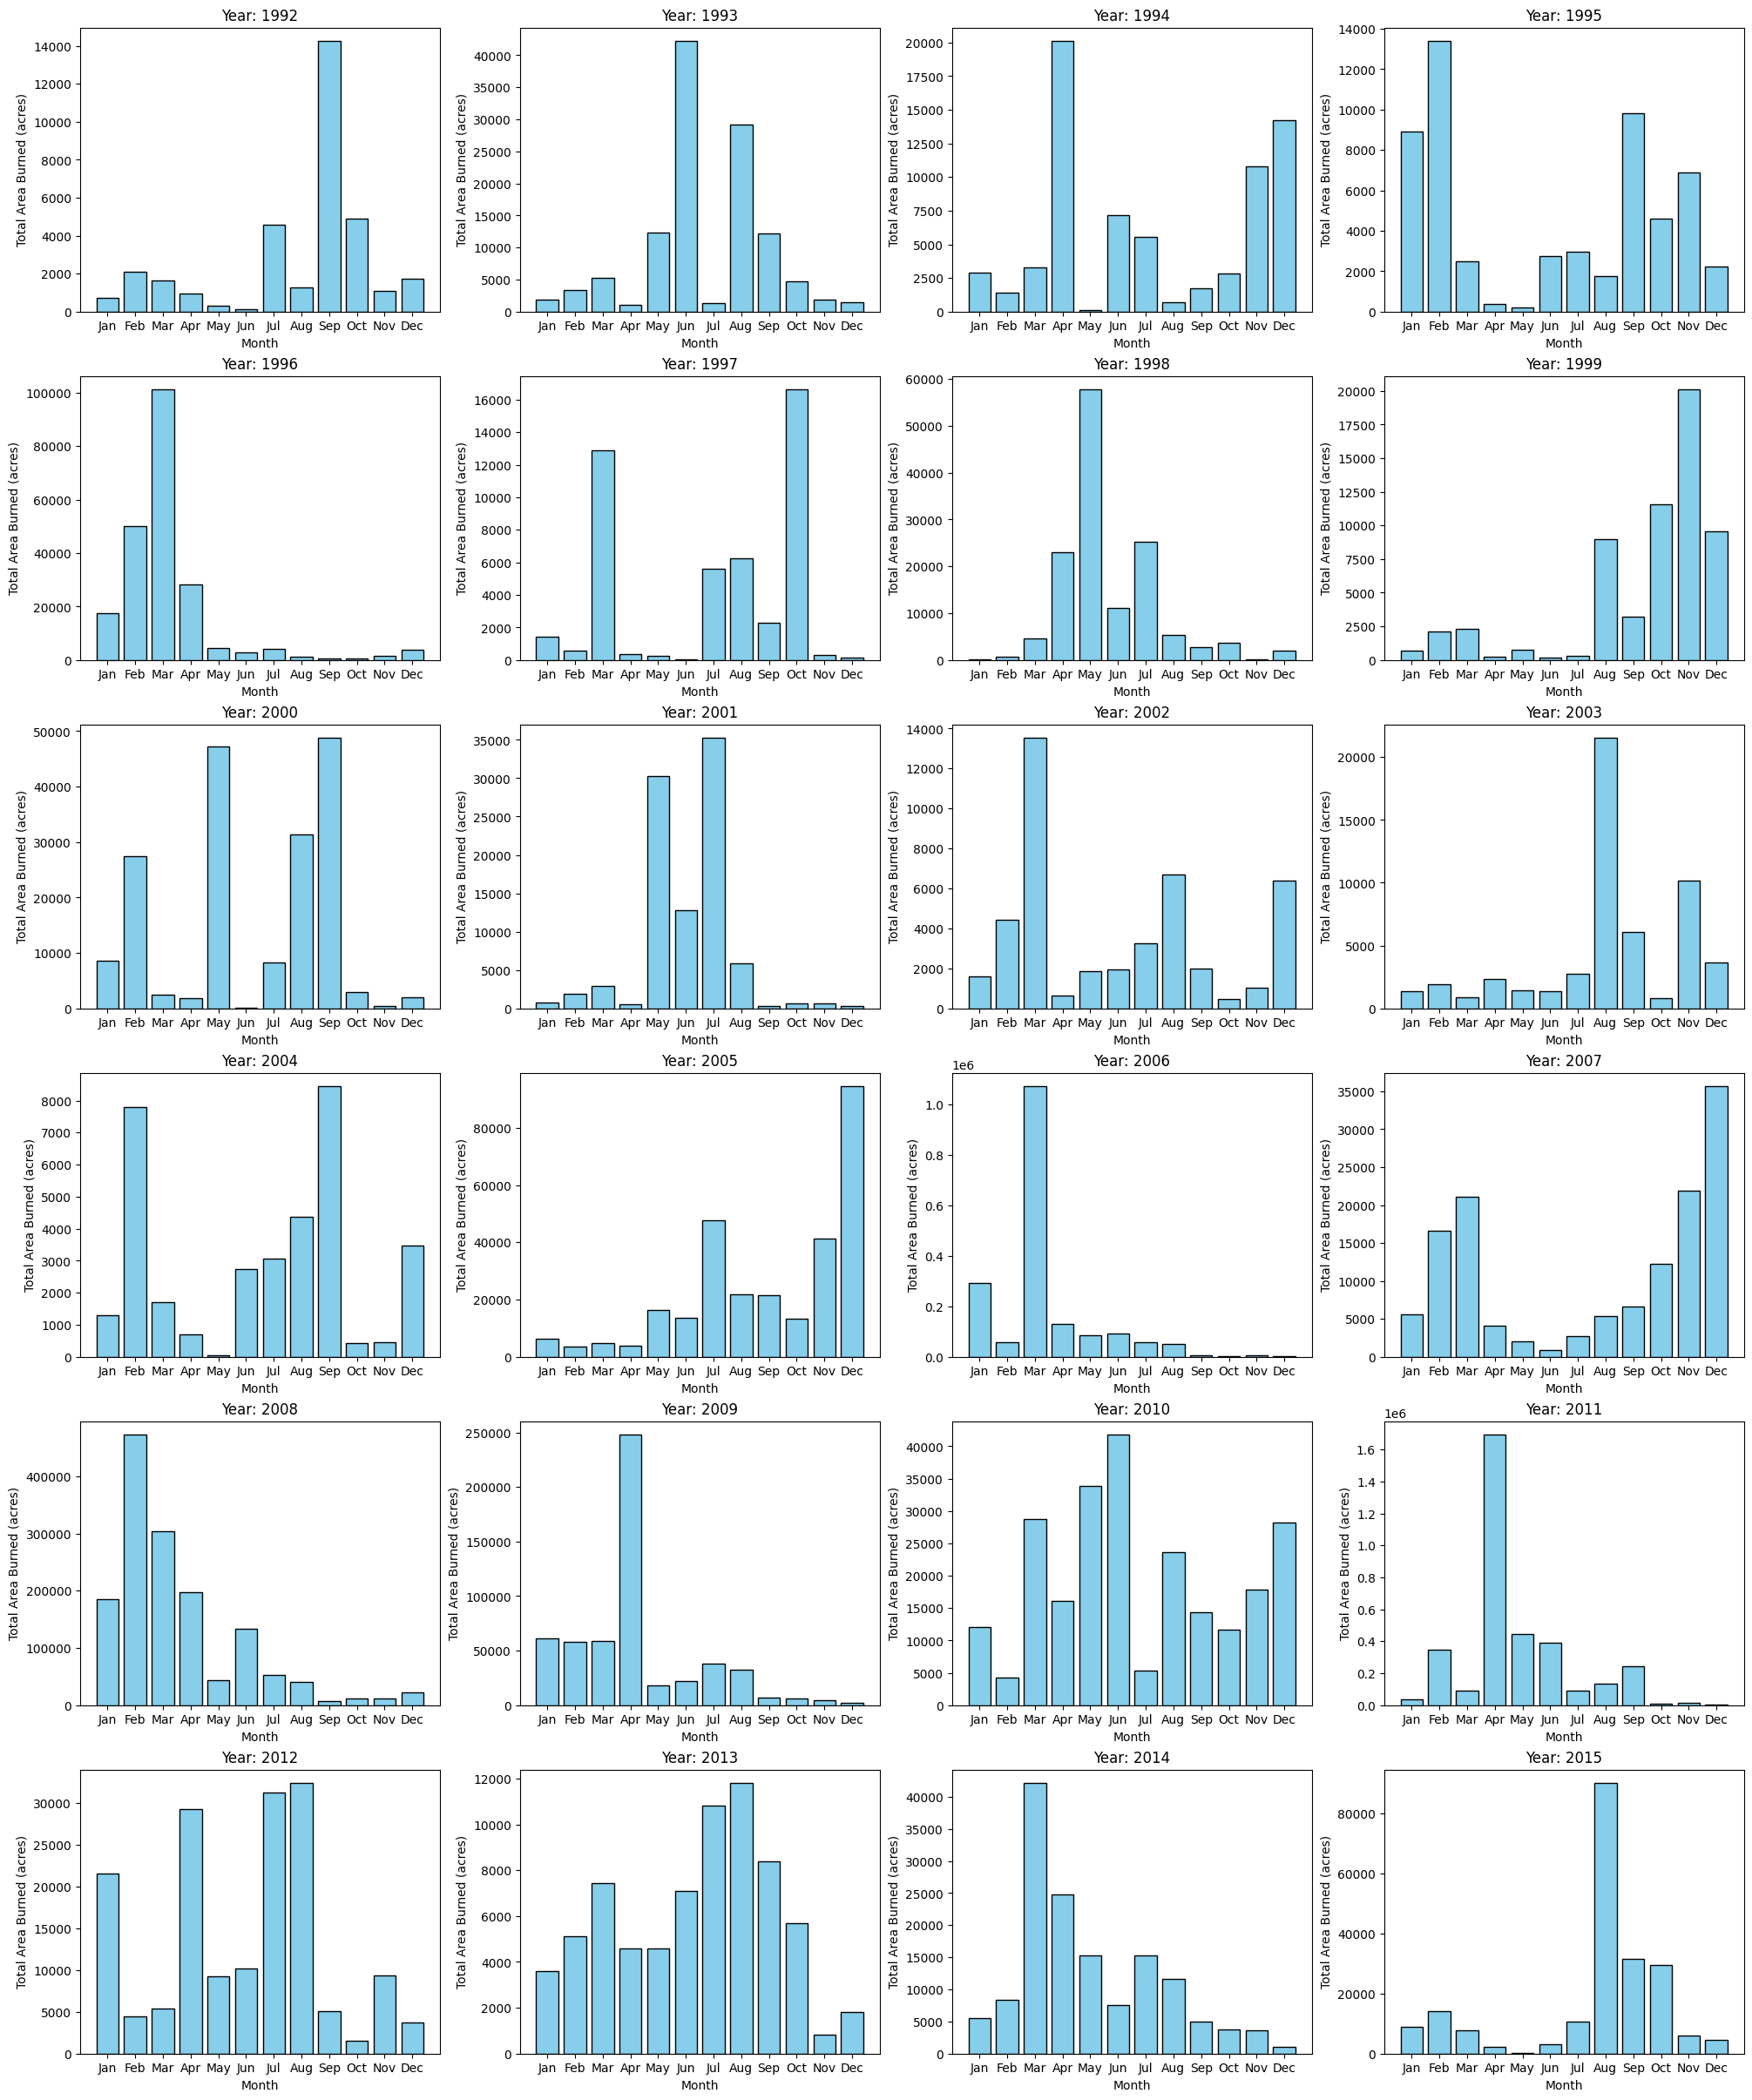

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('dataset/texas_fires.csv')

# Convert DISCOVERY_DATE_NEW to datetime format
df['DISCOVERY_DATE_NEW'] = pd.to_datetime(df['DISCOVERY_DATE_NEW'])

# Extract month and year
df['Month'] = df['DISCOVERY_DATE_NEW'].dt.month
df['Year'] = df['DISCOVERY_DATE_NEW'].dt.year

# Group by year and month, then count the number of fires
# monthly_fires = df.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')
monthly_area = df.groupby(['Year', 'Month'])['FIRE_SIZE'].sum().reset_index(name='Total_Area')

# Get unique years and set up subplots
unique_years = monthly_fires['Year'].unique()
num_years = len(unique_years)
cols = 4  # Number of columns in subplot grid
rows = (num_years // cols) + (num_years % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), constrained_layout=True)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each year's histogram
for i, year in enumerate(unique_years):
    data = monthly_area[monthly_area['Year'] == year]
    month_data = np.repeat(data['Month'], data['Total_Area'])
    hist, bins = np.histogram(month_data, bins=np.arange(1, 14))
    
    axes[i].bar(bins[:-1], hist, width=0.8, align='center', color='skyblue', edgecolor='black')
    axes[i].set_title(f'Year: {year}')
    axes[i].set_xticks(np.arange(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Total Area Burned (acres)')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


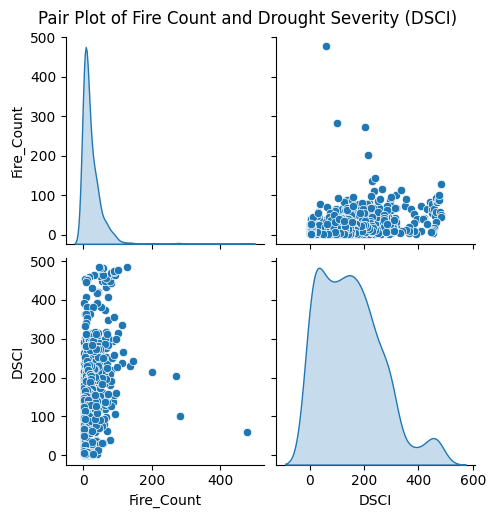

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load fire data
df = pd.read_csv('dataset/texas_fires.csv')

# Convert DISCOVERY_DATE_NEW to datetime format
df['DISCOVERY_DATE_NEW'] = pd.to_datetime(df['DISCOVERY_DATE_NEW'])

# Extract month and year
df['Month'] = df['DISCOVERY_DATE_NEW'].dt.month
df['Year'] = df['DISCOVERY_DATE_NEW'].dt.year

# Group by year and month, then count the number of fires
monthly_fires = df.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')
# Load drought data
drought_df = pd.read_csv('dataset/drought_state_tx.csv')
drought_df['MapDate'] = pd.to_datetime(drought_df['MapDate'], format='%Y%m%d')



# Merge fire counts with drought data
merged_df = pd.merge(fire_counts, drought_df, left_on='DISCOVERY_DATE_NEW', right_on='MapDate')

# Plot pair plot
sns.pairplot(merged_df[['Fire_Count', 'DSCI']], diag_kind='kde', kind='scatter')
plt.suptitle('Pair Plot of Fire Count and Drought Severity (DSCI)', y=1.02)

plt.show()
